# Sentiment Analysis

This project uses technique called **Natural Language Processing (NLP)** in order to find out which emotion is related to a given sentence.

Necesarry imports:

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")


In [2]:
from google.colab import drive

drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset

The dataset is already splitted into train, test and validation datases.

In [3]:
with open("/content/drive/MyDrive/Sentiment_Analysis/data/train.txt", "r") as f:
    train_data = f.read().splitlines()

with open("/content/drive/MyDrive/Sentiment_Analysis/data/val.txt", "r") as f:
    val_data = f.read().splitlines()

with open("/content/drive/MyDrive/Sentiment_Analysis/data/test.txt", "r") as f:
    test_data = f.read().splitlines()

print(train_data[1])


i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness


Each row of data consists of a sentence and a label separated with semicolon. In order to split them a following function is defined:

In [4]:
def sentence_label_split(data: list) -> tuple:
    """Function splits the data into sentences and labels.

        Parameters:
        - data: list

        Return:
        - (sentences, labels) - tuple
    """

    sentences = []
    labels = []

    for row in data:
        sentence, label = row.split(";")
        sentences.append(sentence)
        labels.append(label)

    return (np.array(sentences), np.array(labels))


In [5]:
train_sentences, train_labels = sentence_label_split(train_data)
val_sentences, val_labels = sentence_label_split(val_data)
test_sentences, test_labels = sentence_label_split(test_data)


In [6]:
labels_unique = np.unique(train_labels)

print(f"The sentences descibe following emotions: {labels_unique}")


The sentences descibe following emotions: ['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']


### Replacling label names with integer values

In [7]:
train_labels = np.array([np.where(labels_unique == x)[0][0]
                        for x in train_labels])
val_labels = np.array([np.where(labels_unique == x)[0][0] for x in val_labels])
test_labels = np.array([np.where(labels_unique == x)[0][0]
                       for x in test_labels])


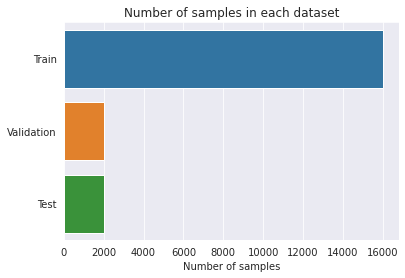

In [189]:
x_data = [len(train_sentences), len(val_sentences), len(test_sentences)]
y_data = ['Train', 'Validation', 'Test']

sns.barplot(x=x_data, y=y_data)
plt.title("Number of samples in each dataset")
plt.xlabel("Number of samples")

plt.show()


### Counting unique words

In [9]:
from collections import Counter


In [10]:
def count_words(sentences: np.array) -> Counter:
    """Function counts number of each word's occurance

        Parameters:
        - sentence: np.array - numpy array containing sentences

        Return:
        - Counter - counter object with number of each word's occurance
    """

    counter = Counter()

    for sentence in sentences:
        for word in sentence.split():
            counter[word] += 1

    return counter


In [11]:
all_sentences = np.concatenate(
    (train_sentences, val_sentences, test_sentences), axis=0)

counter = count_words(all_sentences)
n_unique_words = len(counter)

print(f"Most common words: {counter.most_common(5)}")
print(f"Number of unique words: {n_unique_words}")


Most common words: [('i', 32242), ('feel', 13938), ('and', 11996), ('to', 11208), ('the', 10462)]
Number of unique words: 17096


## Tokenizing data

The sentences will be represented as sequences of numbers.

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [13]:
tokenizer = Tokenizer(num_words=n_unique_words)
tokenizer.fit_on_texts(train_sentences)


In [14]:
tokenizer.word_index


{'i': 1,
 'feel': 2,
 'and': 3,
 'to': 4,
 'the': 5,
 'a': 6,
 'feeling': 7,
 'that': 8,
 'of': 9,
 'my': 10,
 'in': 11,
 'it': 12,
 'like': 13,
 'so': 14,
 'for': 15,
 'im': 16,
 'me': 17,
 'but': 18,
 'was': 19,
 'have': 20,
 'is': 21,
 'this': 22,
 'am': 23,
 'with': 24,
 'not': 25,
 'about': 26,
 'be': 27,
 'as': 28,
 'on': 29,
 'you': 30,
 'just': 31,
 'at': 32,
 'when': 33,
 'or': 34,
 'all': 35,
 'because': 36,
 'more': 37,
 'do': 38,
 'can': 39,
 'really': 40,
 'up': 41,
 't': 42,
 'are': 43,
 'by': 44,
 'very': 45,
 'know': 46,
 'been': 47,
 'if': 48,
 'out': 49,
 'myself': 50,
 'time': 51,
 'how': 52,
 'what': 53,
 'get': 54,
 'little': 55,
 'had': 56,
 'now': 57,
 'will': 58,
 'from': 59,
 'being': 60,
 'they': 61,
 'people': 62,
 'them': 63,
 'would': 64,
 'he': 65,
 'want': 66,
 'her': 67,
 'some': 68,
 'think': 69,
 'one': 70,
 'still': 71,
 'ive': 72,
 'him': 73,
 'even': 74,
 'who': 75,
 'an': 76,
 'life': 77,
 'its': 78,
 'make': 79,
 'there': 80,
 'we': 81,
 'bit': 82

In [15]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)


In [16]:
print(train_sentences[:5])
print(train_sequences[:5])


['i didnt feel humiliated'
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'
 'im grabbing a minute to post i feel greedy wrong'
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property'
 'i am feeling grouchy']
[[1, 138, 2, 678], [1, 39, 100, 59, 7, 14, 493, 4, 14, 3495, 552, 31, 59, 60, 127, 147, 75, 1479, 3, 21, 1254], [16, 3059, 6, 1148, 4, 285, 1, 2, 494, 437], [1, 23, 164, 7, 664, 26, 5, 4157, 1, 58, 46, 8, 12, 21, 71, 29, 5, 3496], [1, 23, 7, 1064]]


### Paddding sequences to the same length

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [18]:
max_length = max(map(len, train_sequences))

train_padded = pad_sequences(train_sequences, maxlen=max_length,
                             padding="post", truncating="post")

val_padded = pad_sequences(val_sequences, maxlen=max_length,
                           padding="post", truncating="post")

test_padded = pad_sequences(test_sequences, maxlen=max_length,
                            padding="post", truncating="post")


In [19]:
print(f"Train shape: {train_padded.shape}")
print(f"Validation shape: {val_padded.shape}")
print(f"Test shape: {test_padded.shape}")


Train shape: (16000, 66)
Validation shape: (2000, 66)
Test shape: (2000, 66)


In [20]:
print(train_sentences[0])
print(train_sequences[0])
print(train_padded[0])


i didnt feel humiliated
[1, 138, 2, 678]
[  1 138   2 678   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]


### Creating model

In this case a **Recurrent Neural Network** with LSTM layer in order to solve natural language processing problem.

In [21]:
# keras.backend.clear_session()
# del model

model = keras.models.Sequential()

model.add(layers.Embedding(n_unique_words, 32, input_length=max_length))
model.add(layers.LSTM(64, dropout=0.2))
model.add(layers.Dense(len(labels_unique), activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 32)            547072    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 572,294
Trainable params: 572,294
Non-trainable params: 0
_________________________________________________________________


In [22]:
loss = keras.losses.SparseCategoricalCrossentropy()
optim = keras.optimizers.Adam(learning_rate=0.001)

metrics = [keras.metrics.SparseCategoricalAccuracy(name="accuracy")]

model.compile(optimizer=optim, loss=loss, metrics=metrics)


### Training the model

In [23]:
epochs = 200
batch_size = 32

model_history = model.fit(train_padded, train_labels, epochs=epochs,
                          batch_size=batch_size, validation_data=(val_padded, val_labels))


Epoch 1/200
500/500 [==============================] - 10s 7ms/step - loss: 1.5857 - accuracy: 0.3289 - val_loss: 1.5821 - val_accuracy: 0.3520
Epoch 2/200
500/500 [==============================] - 4s 7ms/step - loss: 1.5736 - accuracy: 0.3327 - val_loss: 1.5834 - val_accuracy: 0.3520
Epoch 3/200
500/500 [==============================] - 3s 6ms/step - loss: 1.5542 - accuracy: 0.3284 - val_loss: 1.5772 - val_accuracy: 0.3475
Epoch 4/200
500/500 [==============================] - 4s 9ms/step - loss: 1.5747 - accuracy: 0.3304 - val_loss: 1.5812 - val_accuracy: 0.3485
Epoch 5/200
500/500 [==============================] - 5s 9ms/step - loss: 1.5744 - accuracy: 0.3331 - val_loss: 1.5798 - val_accuracy: 0.3520
Epoch 6/200
500/500 [==============================] - 4s 8ms/step - loss: 1.5746 - accuracy: 0.3318 - val_loss: 1.5796 - val_accuracy: 0.3520
Epoch 7/200
500/500 [==============================] - 4s 8ms/step - loss: 1.5767 - accuracy: 0.3338 - val_loss: 1.5798 - val_accuracy: 0.352

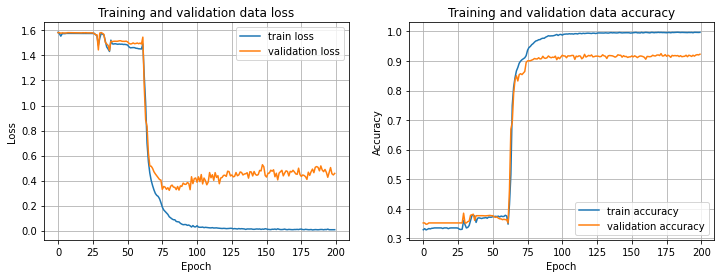

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(model_history.history['loss'], label="train loss")
ax1.plot(model_history.history['val_loss'], label="validation loss")
ax1.set_title("Training and validation data loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")

ax2.plot(model_history.history['accuracy'], label="train accuracy")
ax2.plot(model_history.history['val_accuracy'], label="validation accuracy")
ax2.set_title("Training and validation data accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")

ax1.grid()
ax2.grid()

ax1.legend()
ax2.legend()

plt.show()


### Model evaluation

In [25]:
eval_loss, eval_accuracy = model.evaluate(test_padded, test_labels)

print(f"Test dataset loss: {eval_loss:.4f}")
print(f"Test dataset accuracy: {eval_accuracy*100:.2f}%")


63/63 [==============================] - 0s 4ms/step - loss: 0.5176 - accuracy: 0.9065
Test dataset loss: 0.5176
Test dataset accuracy: 90.65%


In [32]:
random_idxs = np.random.randint(0, len(test_padded), 5)

for idx in random_idxs:
    out = model(test_padded[[idx]])
    pred = np.argmax(out)
    print(test_sentences[idx])
    print(
        f"Predicted label: {labels_unique[pred]}, probability {np.max(out)*100:.2f}%")
    print(f"Actual label: {labels_unique[test_labels[idx]]}")


i feel like a lot of men are royally fucked up and go through life wreaking havoc and end up destroying themselves in the process
Predicted label: anger, probability 100.00%
Actual label: anger
i can put on it without words since i just cant type on that it was so lovely this morning yes im feeling sarcastic today
Predicted label: anger, probability 99.95%
Actual label: anger
i was studying i always had the feeling that the process was unpleasant but it was absolutely necessary
Predicted label: sadness, probability 100.00%
Actual label: sadness
i like to think i present myself and the life and times of the working mum to a good standard and if i ever do miss a apostrophe or miss spell a particular word please feel free to call me on it
Predicted label: love, probability 45.84%
Actual label: joy
i werent feeling crappy enough aunt flo decided to show up and im bloated like a balloon
Predicted label: sadness, probability 100.00%
Actual label: sadness


#### Saving model

In [33]:
model.save("/content/drive/MyDrive/Sentiment_Analysis/simple_model")


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sentiment_Analysis/simple_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sentiment_Analysis/simple_model/assets


In [35]:
# making and saving predictions
preds = model.predict(test_padded)
preds = np.argmax(preds, axis=1)
np.save("/content/drive/MyDrive/Sentiment_Analysis/simple_model_preds.npy", preds)


## BERT Classifier

In [9]:
import os
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization


In [10]:
# !pip install tf-models-official tensorflow-text


In [ ]:
for directory in os.listdir("/content/drive/MyDrive/Sentiment_Analysis/data_bert"):
    for label in labels_unique:
        os.mkdir(
            f"/content/drive/MyDrive/Sentiment_Analysis/data_bert/{directory}/{label}")


#### Creating folders structure containing train, validation and test data

In [ ]:
i = 0

for sentence, label in zip(train_sentences, train_labels):
    with open(f"/content/drive/MyDrive/Sentiment_Analysis/data_bert/train/{labels_unique[label]}/{i}.txt", "w") as f:
        f.write(sentence)
        i += 1

i = 0

for sentence, label in zip(val_sentences, val_labels):
    with open(f"/content/drive/MyDrive/Sentiment_Analysis/data_bert/val/{labels_unique[label]}/{i}.txt", "w") as f:
        f.write(sentence)
        i += 1

i = 0

for sentence, label in zip(test_sentences, test_labels):
    with open(f"/content/drive/MyDrive/Sentiment_Analysis/data_bert/test/{labels_unique[label]}/{i}.txt", "w") as f:
        f.write(sentence)
        i += 1


#### Creating dataset objects

In [10]:
batch_size = 32

train_ds = keras.preprocessing.text_dataset_from_directory(
    "/content/drive/MyDrive/Sentiment_Analysis/data_bert/train/",
    batch_size=batch_size,
    seed=24
)

val_ds = keras.preprocessing.text_dataset_from_directory(
    "/content/drive/MyDrive/Sentiment_Analysis/data_bert/val/",
    batch_size=batch_size,
    seed=24
)

test_ds = keras.preprocessing.text_dataset_from_directory(
    "/content/drive/MyDrive/Sentiment_Analysis/data_bert/test/",
    batch_size=batch_size
)


Found 16000 files belonging to 6 classes.
Found 2000 files belonging to 6 classes.
Found 2000 files belonging to 6 classes.


#### Showing some example sentences with labels

In [11]:
for text, label in train_ds.take(1):
    for i in range(4):
        print(text.numpy()[i], label.numpy()[i])


b'i feel i have a lot of strong points concerning the economy unemployment debt and other options' 2
b'i was so panicked i didn t feel it when my nails broke against the impenetrable wall of ice leaving red crescents of blood welling up on sensitive skin' 4
b'i acknowledge that i am not actually fat by definition but feeling uncomfortable in my skin' 1
b'i chefs are all so friendly and make you feel valued' 2


#### Choosing BERT model

In [12]:
bert_handle_encoder = "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1"
bert_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"


#### Preprocessing model

In [13]:
bert_preprocess_model = hub.KerasLayer(bert_handle_preprocess)

test_text = ['checking if preprocessing works fine']
text_preprocessed = bert_preprocess_model(test_text)

print(f"Keys:       {text_preprocessed.keys()}")
print(f"Shape:      {text_preprocessed['input_word_ids'].shape}")
print(f"Word Ids:   {text_preprocessed['input_word_ids'][0, :15]}")
print(f"Input mask: {text_preprocessed['input_mask'][0, :15]}")
print(f"Type Ids:   {text_preprocessed['input_type_ids'][0, :15]}")


Keys:       dict_keys(['input_mask', 'input_word_ids', 'input_type_ids'])
Shape:      (1, 128)
Word Ids:   [  101  9361  2065 17463  3217  9623  7741  2573  2986   102     0     0
     0     0     0]
Input mask: [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
Type Ids:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


There are 3 outputs returned by preprocessing model (*input_type_ids*, *input_word_ids*, *input_mask*). These outputs will be used by a BERT model.

#### Creating BERT model

In [14]:
bert_model = hub.KerasLayer(bert_handle_encoder)

bert_output = bert_model(text_preprocessed)

print(f"Pooled outputs shape: {bert_output['pooled_output'].shape}")
print(f"Pooled outputs values: {bert_output['pooled_output'][0, :15]}")
print(f"Sequence outputs shape: {bert_output['sequence_output'].shape}")
print(f"Sequence outputs values: {bert_output['sequence_output'][0, :15]}")


Pooled outputs shape: (1, 512)
Pooled outputs values: [ 0.9913647   0.74829036  0.06618804 -0.12184247  0.26863042  0.9967172
  0.98107284 -0.9931756  -0.11028754 -0.9986012   0.16494273 -0.95244414
 -0.9310289  -0.99147934  0.81051135]
Sequence outputs shape: (1, 128, 512)
Sequence outputs values: [[ 0.41100502  0.11983856 -0.15835541 ... -0.63233936  0.8885101
   1.4830964 ]
 [-0.0838573   0.37623483  0.12855293 ... -0.36483672  0.98197705
   1.1377997 ]
 [ 0.00335698 -0.10592368 -0.2386178  ... -0.453412    0.57349265
   0.35410136]
 ...
 [-0.15436706  0.33143008 -0.04893322 ...  0.10312583  1.5005268
   0.5577128 ]
 [ 0.21591225  0.4729985   0.02549964 ... -0.10865977  1.2491347
   0.02781066]
 [ 0.22173634  0.63579524  0.05186363 ...  0.35662848  0.92376703
   0.6942982 ]]


#### Definig classification model

In [15]:
def create_model() -> keras.Model:
    text_input = layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(
        bert_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(
        bert_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = layers.Dropout(0.1)(net)
    net = layers.Dense(len(labels_unique), activation=None,
                       name='classifier')(net)
    return keras.Model(text_input, net)


In [16]:
classifier_model = create_model()
bert_raw_output = classifier_model(tf.constant(test_text))
print(tf.nn.softmax(bert_raw_output))


tf.Tensor([[0.4197294  0.08626943 0.11666978 0.03989536 0.09645668 0.24097927]], shape=(1, 6), dtype=float32)


The model hasn't been trained yet, so the output has no meaning.

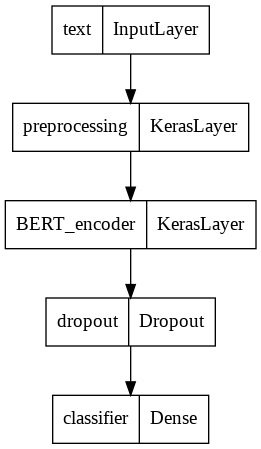

In [17]:
keras.utils.plot_model(classifier_model)


#### Training model

In [18]:
# In Multiclass classification problem we use Sparse Categorical Crossentropy loss
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

metrics = [keras.metrics.SparseCategoricalAccuracy(name="accuracy")]

# We will use AdamW optimizer. It minimizes the prediction loss and does regularization by weight decay
epochs = 20
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)
init_lr = 2e-5

optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type="adamw")


In [19]:
classifier_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/Sentiment_Analysis/checkpoints",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [21]:
history = classifier_model.fit(
    x=train_ds, validation_data=val_ds, epochs=epochs, callbacks=[model_checkpoint_callback])


Epoch 1/20
500/500 [==============================] - 130s 260ms/step - loss: 1.5267 - accuracy: 0.4155 - val_loss: 0.9923 - val_accuracy: 0.6600
Epoch 2/20
500/500 [==============================] - 137s 274ms/step - loss: 0.6053 - accuracy: 0.7931 - val_loss: 0.2512 - val_accuracy: 0.9125
Epoch 3/20
500/500 [==============================] - 138s 276ms/step - loss: 0.2341 - accuracy: 0.9124 - val_loss: 0.1737 - val_accuracy: 0.9290
Epoch 4/20
500/500 [==============================] - 137s 274ms/step - loss: 0.1561 - accuracy: 0.9363 - val_loss: 0.1703 - val_accuracy: 0.9265
Epoch 5/20
500/500 [==============================] - 136s 271ms/step - loss: 0.1220 - accuracy: 0.9472 - val_loss: 0.1672 - val_accuracy: 0.9250
Epoch 6/20
500/500 [==============================] - 133s 265ms/step - loss: 0.1059 - accuracy: 0.9536 - val_loss: 0.1802 - val_accuracy: 0.9315
Epoch 7/20
500/500 [==============================] - 138s 276ms/step - loss: 0.0937 - accuracy: 0.9585 - val_loss: 0.1698 -

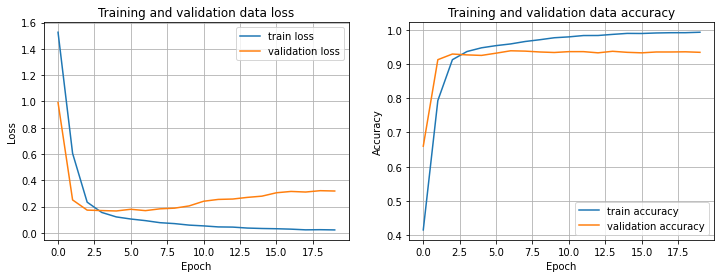

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(history.history['loss'], label="train loss")
ax1.plot(history.history['val_loss'], label="validation loss")
ax1.set_title("Training and validation data loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")

ax2.plot(history.history['accuracy'], label="train accuracy")
ax2.plot(history.history['val_accuracy'], label="validation accuracy")
ax2.set_title("Training and validation data accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")

ax1.grid()
ax2.grid()

ax1.legend()
ax2.legend()

plt.show()


In [23]:
eval_loss, eval_accuracy = classifier_model.evaluate(test_ds)

print(f"Test dataset loss: {eval_loss:.4f}")
print(f"Test dataset accuracy: {eval_accuracy*100:.2f}%")


63/63 [==============================] - 718s 10s/step - loss: 0.3534 - accuracy: 0.9255
Test dataset loss: 0.3534
Test dataset accuracy: 92.55%


In [24]:
classifier_model.save("/content/drive/MyDrive/Sentiment_Analysis/bert_model")


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sentiment_Analysis/bert_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sentiment_Analysis/bert_model/assets


In [25]:
def get_prediction(text: str) -> tuple:
    pred = classifier_model(tf.constant([text]))
    pred = tf.nn.softmax(pred)
    pred_idx = np.argmax(pred)
    proba = np.max(pred)
    return labels_unique[pred_idx], proba


In [34]:
random_idxs = np.random.randint(0, len(test_sentences), 5)

for idx in random_idxs:
    pred, proba = get_prediction(test_sentences[idx])
    print(test_sentences[idx])
    print(f"Predicted label: {pred}, probability: {proba*100:.2f}%")
    print(f"Actual label: {labels_unique[test_labels[idx]]}\n")


i usually like sam but sometimes he gets downright whiny and i ll admit that all the mistakes he made due to sibling rivalry and pride that eventually led to the end of season kind of made me feel less tragic about the whole thing
Predicted label: sadness, probability: 100.00%
Actual label: sadness

i am feeling energized productive and creative
Predicted label: joy, probability: 100.00%
Actual label: joy

i feel that working together and supporting each other as a whole i can represent a larger younger voice in politics what can i say to that
Predicted label: joy, probability: 97.61%
Actual label: love

i feel it like you target blank class di title bookmark on del
Predicted label: sadness, probability: 100.00%
Actual label: sadness

i feel terrible when i hurt peoples feelings worse afterwards and i always hope never to do it again
Predicted label: sadness, probability: 100.00%
Actual label: sadness



In [35]:
preds = classifier_model.predict(test_sentences)


63/63 [==============================] - 6s 93ms/step


In [36]:
preds = tf.nn.softmax(preds)
preds = np.argmax(preds, axis=1)

np.save("/content/drive/MyDrive/Sentiment_Analysis/bert_model_preds.npy", preds)


## Models comparison



In [108]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
import pandas as pd


In [51]:
preds_simple = np.load(
    "/content/drive/MyDrive/Sentiment_Analysis/simple_model_preds.npy")
preds_bert = np.load(
    "/content/drive/MyDrive/Sentiment_Analysis/bert_model_preds.npy")


In [59]:
print("Simple model report:")
print(classification_report(test_labels, preds_simple, target_names=labels_unique))

print("-" * 70)
print("Bert model report:")
print(classification_report(test_labels, preds_bert, target_names=labels_unique))


Simple model report:
              precision    recall  f1-score   support

       anger       0.89      0.92      0.90       275
        fear       0.92      0.87      0.89       224
         joy       0.92      0.94      0.93       695
        love       0.75      0.78      0.76       159
     sadness       0.95      0.94      0.94       581
    surprise       0.77      0.71      0.74        66

    accuracy                           0.91      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.91      0.91      0.91      2000

----------------------------------------------------------------------
Bert model report:
              precision    recall  f1-score   support

       anger       0.93      0.92      0.93       275
        fear       0.91      0.91      0.91       224
         joy       0.94      0.94      0.94       695
        love       0.79      0.80      0.80       159
     sadness       0.96      0.97      0.97       581
    surprise       0.

As we can see for two classes the precision, recall and f1-score is less than 0.9 (1 is the best possible score). It may be caused by lower number of samples for that classes.

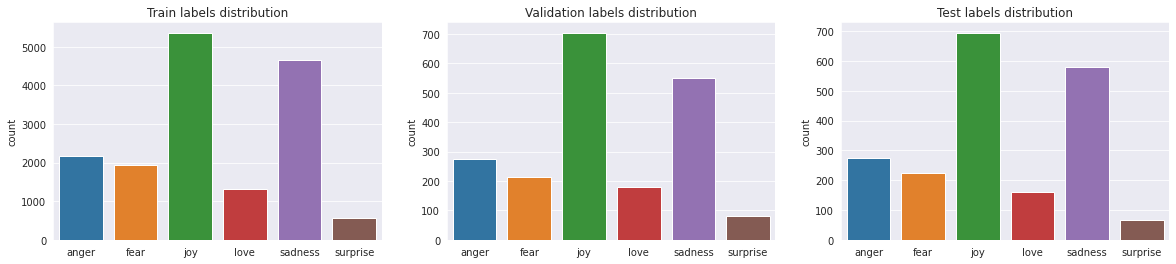

In [190]:
fig = plt.figure(figsize=(20, 4))

ax = fig.add_subplot(1, 3, 1)
sns.countplot(x=train_labels, ax=ax)
plt.xticks(range(6), labels_unique)
ax.set_title("Train labels distribution")

ax = fig.add_subplot(1, 3, 2)
sns.countplot(x=val_labels, ax=ax)
plt.xticks(range(6), labels_unique)
ax.set_title("Validation labels distribution")

ax = fig.add_subplot(1, 3, 3)
sns.countplot(x=test_labels, ax=ax)
plt.xticks(range(6), labels_unique)
ax.set_title("Test labels distribution")

plt.show()


As we can see in classes *joy* and *saness* there are the highest number of samples. In these classes metrics values were the best.

#### Models metrics comparison

In [129]:
metrics_simple = precision_recall_fscore_support(
    test_labels, preds_simple, average=None)
metrics_bert = precision_recall_fscore_support(
    test_labels, preds_bert, average=None)

accuracy_simple = accuracy_score(test_labels, preds_simple)
accuracy_bert = accuracy_score(test_labels, preds_bert)


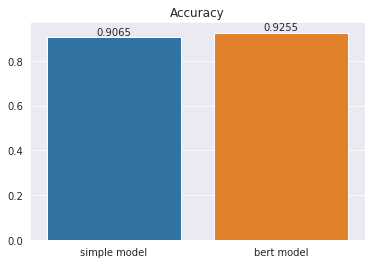

In [191]:
ax = sns.barplot(x=['simple model', 'bert model'],
                 y=[accuracy_simple, accuracy_bert])

[ax.text(i, acc+0.01, str(acc), ha='center')
 for i, acc in enumerate([accuracy_simple, accuracy_bert])]

ax.set_title("Accuracy")

plt.show()


In [154]:
metrics_df = pd.DataFrame(np.c_[metrics_simple, metrics_bert])
metrics_df = metrics_df.T
metrics_df.columns = ['precision', 'recall', 'f1-score', 'support']

metrics_df['model'] = ''
metrics_df.loc[:5, 'model'] = 'simple'
metrics_df.loc[6:, 'model'] = 'bert'

metrics_df['class'] = np.r_[labels_unique, labels_unique]

metrics_df


,precision,recall,f1-score,support,model,class
0,0.887719,0.920000,0.903571,275.0,simple,anger
1,0.915493,0.870536,0.892449,224.0,simple,fear
2,0.923295,0.935252,0.929235,695.0,simple,joy
3,0.746988,0.779874,0.763077,159.0,simple,love
4,0.952715,0.936317,0.944444,581.0,simple,sadness
5,0.770492,0.712121,0.740157,66.0,simple,surprise
6,0.933579,0.920000,0.926740,275.0,bert,anger
7,0.906250,0.906250,0.906250,224.0,bert,fear
8,0.943642,0.939568,0.941601,695.0,bert,joy
9,0.793750,0.798742,0.796238,159.0,bert,love


In [186]:
def plot_metric(metric: str) -> None:
    plt.figure(figsize=(12, 5))
    plt.grid()
    ax = sns.barplot(x='class', y=metric, data=metrics_df, hue='model')
    ax.set_title(f"{metric.capitalize()} in each class")
    [ax.text(i-0.2, val+0.01, str(val)[:5], ha='center')
     for i, val in enumerate(metrics_df[metric][:6])]
    [ax.text(i+0.2, val+0.01, str(val)[:5], ha='center')
     for i, val in enumerate(metrics_df[metric][6:])]
    plt.show()


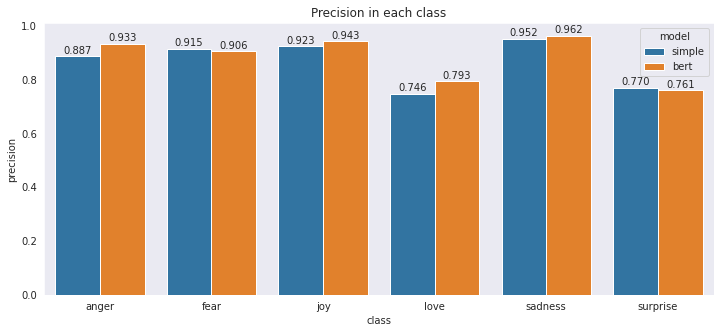

In [192]:
plot_metric('precision')


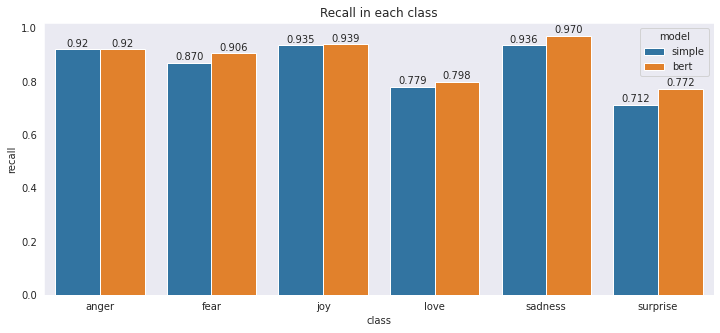

In [193]:
plot_metric('recall')


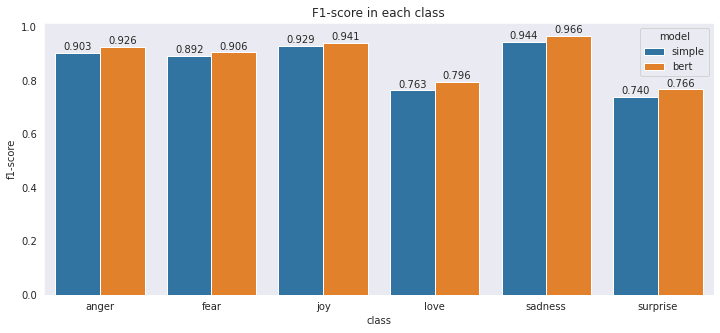

In [195]:
plot_metric('f1-score')


## Conclusions

1) Both models did quite well with sentiment analysis problem (accuracy greater than 90% on test data). Bert model did a little better in terms of accuracy (92.55%) and other metrics presented in figures above.

2) Bert model needs much less epochs in training process to get small loss and high accuracy.

3) In order to get better results more data is nedded, especially in classes *love* and *sadness*.

4) It is also possible to tune both models to get better results. However, the training process is time and resources counsuming.